# Test 1 #

### Your Name:

## Q1. ##
We want to predict the chance that a person of interest is going to be on an arriving bus or not, using a Naive Bayes estimator, based on a set of 3  determining conditions: <br>
EV1 = Time of the day (Morning, Midday, Afternoon, Evening)<br>
EV2 =  Bus is on time or  Late<br>
EV3 = Raining  or Shining<br>

The goal is to determine the probability the person is on the bus, given a certain set of values for the conditions, for example (actual values are not relevant), EV1 = "Morning", EV2 = "Late", EV3 = "Shining".  In the following question, explain verbally what each term means in this context:

(Write your answer below in **BOLD** font after each question
<br><br>
(a) What are the *priors* (prior probabilities) you need to do this?
<div style="color:blue">ANSWER: 
</div>

**In order to do this, we'd need the prior probabilities of P(person is on the bus), P(EV1|person is on bus), P(EV2|person is on bus), and P(EV3|person is on bus)**

<br><br><br>
(b) What is the *evidence* (or experimental outcome) you have?
<div style="color:blue">ANSWER: 
</div>

**The evidence in this case would be the given certain set of values for the conditions, specifically for EV1, EV2, and EV3.**
<br><br><br>

(c) What is the *posterior* probability in this case (not numbers, just the meaning of posterior)? 
<div style="color:blue">
ANSWER:
</div>

**The posterior probability would be what we're looking to determine: The probability the person of interest is on the bus given a set of conditions EV1, EV2, and EV3, or P(person is on bus|EV1, EV2, EV3).**




## Q2 ##

The following table shows data on different conditions (RACE, DPROS, DCAPS) 
that leads to prescription of medications (MED) tagged 0 or 1. 
Use the contingency tables below to calculate the probability that a person with 
the condition RACE=1, DPROS=3, DCAPS=2  will be prescribed medication 1.


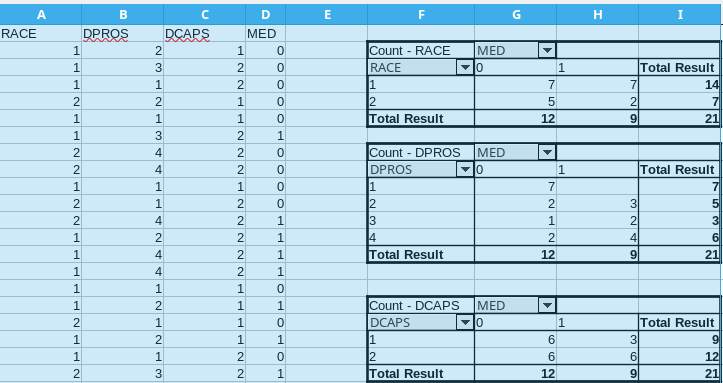

Write the answer below, showing your work. Use notations like: P(MED=0|RACE=1, DPROS=3, DCAPS=2) = .......


<div style="color:blue">
ANSWER:
</div>

P(MED=1|RACE=1, DPROS=3, DCAPS=2) = (P(RACE=1|MED=1) * P(DPROS=3|MED=1) * P(DCAPS=2|MED=1) * P(MED=1))/P(RACE=1, DPROS=3, DCAPS=2)

= (7/9 * 2/9 * 6/9 * 9/21)/((7/9 * 2/9 * 6/9) + (7/12 * 1/12 * 6/12)) = (estimate) 0.35

## Q3 ##

The *prostate.csv* file contains data on various attributes of patients (AGE, RACE, DPROS, DCAPS, PSA, VOL, GLEASON)  and the medication they were prescribed in the MED column. 

The attributes are all considered numerical (non-categorical).  Follow the instructions to develop and test a Gaussian Naive Bayes model to predict the MED from the other attributes. 
1. Shuffle the data, use random_state=142.
2. Take 90% of data as training set, the rest 10% as test set
3. Train the Gaussian Naive Bayes' model on the training data
4. What is the accuracy of the model when tested against the test data set?
5. For each of the new set of attributes given below, what does the model predict the MED values will be?
<div>
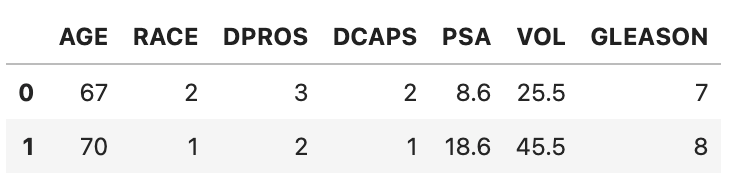

### Reading file in and printing

In [38]:
import pandas as pd
import sklearn as sk

In [39]:
prosData= pd.read_csv("prostate.csv")

In [40]:
prosData

,ID,MED,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
0,1,0,65,1,2,1,1.4,0.0,6
1,2,0,72,1,3,2,6.7,0.0,7
2,3,0,70,1,1,2,4.9,0.0,6
3,4,0,76,2,2,1,51.2,20.0,7
4,5,0,69,1,1,1,12.3,55.9,6
...,...,...,...,...,...,...,...,...,...
375,376,0,58,2,3,1,18.2,28.6,7
376,377,0,69,2,1,1,7.9,14.6,5
377,378,1,76,1,2,1,5.5,53.9,8
378,379,0,69,2,2,1,1.5,8.6,5


### Shuffling Data

In [41]:
X = prosData.sample(frac=1, random_state=142).reset_index(drop=True)

In [63]:
X = X.iloc[:, 1:]

In [89]:
X

,MED,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
2,0,72,1,2,1,5.3,0.0,7
3,0,68,1,4,1,17.1,35.0,9
4,0,69,1,1,1,5.4,37.3,6
5,1,61,1,1,1,21.0,0.0,7
6,0,62,1,2,1,9.0,0.0,6
...,...,...,...,...,...,...,...,...
375,1,62,1,2,1,17.2,0.0,7
376,0,67,1,2,1,2.8,25.6,7
377,1,65,1,3,1,18.0,19.3,7
378,1,69,1,3,1,17.7,21.0,5


### Setting 90% towards training set

In [71]:
train_data = X.iloc[:342, :]

In [72]:
train_data.shape

(342, 8)

### Setting other 10% towards testing set

In [73]:
test_data = X.iloc[342:, :]

In [74]:
test_data.shape

(36, 8)

In [75]:
xTrain = train_data.iloc[:,1:]
yTrain = train_data.iloc[:,:1]

In [76]:
xTrain.shape

(342, 7)

In [77]:
yTrain.shape

(342, 1)

In [78]:
xTest = test_data.iloc[:,1:]
yTest = test_data.iloc[:,:1]

In [79]:
xTest.shape

(36, 7)

In [80]:
yTest.shape

(36, 1)

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
model=GaussianNB()

In [84]:
model.fit(xTrain,yTrain)

C:\Users\nazim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [87]:
pred=model.predict(xTest)

In [88]:
sum(pred==yTest)/yTest.size

C:\Users\nazim\AppData\Local\Temp\ipykernel_6644\2554463590.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  sum(pred==yTest)/yTest.size


ValueError: Unable to coerce to Series, length must be 1: given 36